<a href="https://colab.research.google.com/github/D0H00N/DL/blob/main/5_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels),(test_data,test_labels)) = imdb.load_data(num_words = 10000)
train_data.shape, test_data.shape

((25000,), (25000,))

In [59]:
len(train_data[0])

218

In [60]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [61]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = " ".join( [ reverse_word_index.get(i, "?") for i in train_data[0]] )
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

데이터 준비

In [62]:
import numpy as np

# 피처 단어 번호 멀티-핫 벡터 인코딩
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

# train_data와 test_data가 정의되어 있다고 가정
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [63]:
train_labels[:5]

array([1, 0, 0, 1, 0])

In [64]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [65]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model

<Sequential name=sequential_12, built=False>

In [66]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [67]:
# 훈련 검증
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [68]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6294 - loss: 0.6494 - val_accuracy: 0.8508 - val_loss: 0.4553
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8870 - loss: 0.3832 - val_accuracy: 0.8828 - val_loss: 0.3208
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9236 - loss: 0.2425 - val_accuracy: 0.8847 - val_loss: 0.2886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9452 - loss: 0.1784 - val_accuracy: 0.8897 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9595 - loss: 0.1374 - val_accuracy: 0.8854 - val_loss: 0.2849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9710 - loss: 0.1108 - val_accuracy: 0.8832 - val_loss: 0.2959
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9797 - loss: 0.0853 - val_accuracy: 0.8833 - val_loss: 0.3120
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9854 - loss: 0.0723 - val_accuracy: 0.8785 - v

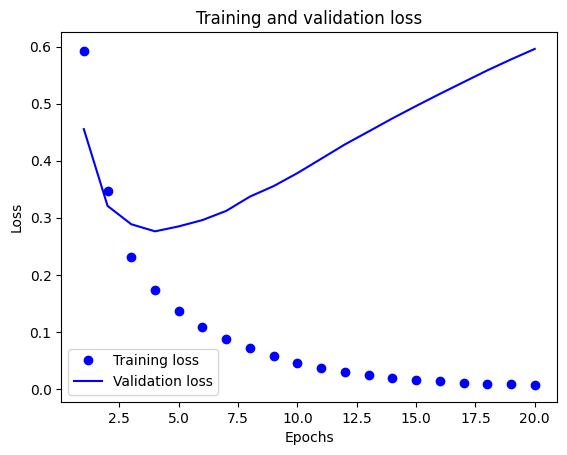

In [69]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

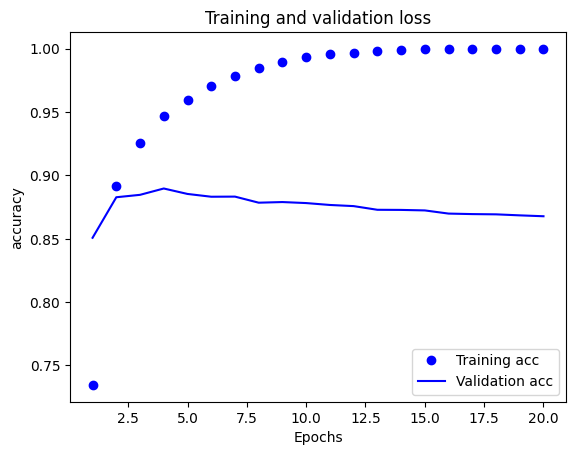

In [70]:
# 훈련과 검증 정확도 그리기
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# 모델 구성 조정 > 검증데이터 수행

In [71]:
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model_1.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6868 - loss: 0.6101 - val_accuracy: 0.8593 - val_loss: 0.4243
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8857 - loss: 0.3676 - val_accuracy: 0.8763 - val_loss: 0.3336
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9149 - loss: 0.2688 - val_accuracy: 0.8845 - val_loss: 0.2968
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9289 - loss: 0.2152 - val_accuracy: 0.8736 - val_loss: 0.3082


In [72]:
# 모델 구성 재조정

from tensorflow import keras
from tensorflow.keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model_2.fit(
    X_train,
    y_train,
    epochs=4,
    batch_size=512
)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6575 - loss: 0.6161
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8909 - loss: 0.3640
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9174 - loss: 0.2514
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9331 - loss: 0.1931


새로운 데이터로 평가

In [73]:
model_2.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.18934461],
       [0.9966649 ],
       [0.84653586],
       ...,
       [0.08916336],
       [0.05588904],
       [0.55977046]], dtype=float32)

In [74]:
# 모델 구성 재조정

from tensorflow import keras
from tensorflow.keras import layers

model_3 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

history = model_3.fit(
    X_train,
    y_train,
    epochs=4,
    batch_size=512
)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7909 - loss: 0.1457
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9371 - loss: 0.0513
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9598 - loss: 0.0355
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9694 - loss: 0.0278


In [75]:
model_3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928,069 (7.36 MB)

 Trainable params: 642,689 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,285,380 (4.90 MB)